<a href="https://colab.research.google.com/github/holictoweb/python_finance_analysis/blob/master/source/fpa_yahoofinance_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The Yahoo Finance API provides access to this data to query all information about:

- finance summaries
- stocks
- quotes
- movers
- charts

In [1]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 11.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=4bc5e3a17dcd5dbeab938e5e70af9fa998291e5db261271b332e983d3f86a931
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd
import numpy as np
import datetime

In [3]:
import yfinance as yf
 
msft = yf.Ticker("MSFT")
 
# get stock info
#print(msft.info)
 
# get historical market data
hist = msft.history(period="5d")
hist.head()

{'zip': '98052-6399', 'sector': 'Technology', 'fullTimeEmployees': 163000, 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and deskt

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-05,242.759995,249.960007,242.699997,249.070007,36910600,0,0
2021-04-06,247.610001,249.399994,246.880005,247.860001,22931900,0,0
2021-04-07,247.809998,250.929993,247.190002,249.899994,22719800,0,0
2021-04-08,252.770004,254.139999,252.000000,253.250000,23625200,0,0
2021-04-09,252.869995,255.990005,252.440002,255.850006,24315700,0,0


#### 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn

In [4]:
sdate = datetime.datetime(2010, 1,1)
edate = datetime.datetime(2021, 3,31)
 
 
amzn = yf.Ticker("AMZN")

In [7]:
 amzn_df = yf.download('AMZN', start=sdate, end=edate)

[*********************100%***********************]  1 of 1 completed


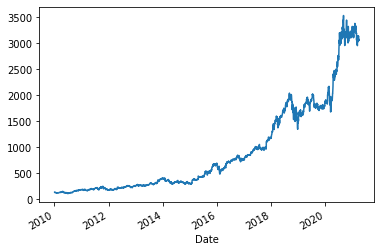

In [8]:

amzn_df['Close'].plot()

### get min data

- 최대 7일이전의 

In [11]:
 sdate = datetime.datetime(2021, 3,24)
edate = datetime.datetime(2021, 3,31)

 data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY AAPL MSFT",
 
        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",
 
        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",
 
        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',
 
        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,
 
        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,
 
        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,
 
        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None,
        start=sdate, 
        end=edate
    )

[*********************100%***********************]  3 of 3 completed


In [12]:
data.head()

MSFT                  ...     SPY               
                             Open    High     Low  ...     Low   Close Volume
Datetime                                           ...                       
2021-03-24 04:00:00-04:00  238.00  238.28  237.79  ...  389.36  389.36    0.0
2021-03-24 04:01:00-04:00     NaN     NaN     NaN  ...  389.25  389.25    0.0
2021-03-24 04:02:00-04:00  237.79  237.79  237.79  ...  389.26  389.29    0.0
2021-03-24 04:03:00-04:00  238.00  238.00  237.89  ...  389.18  389.36    0.0
2021-03-24 04:04:00-04:00  237.87  237.87  237.79  ...  389.26  389.28    0.0

[5 rows x 15 columns]